In [1]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import string 
import operator

In [2]:
barley=pd.read_csv('../Dataset/barley_no_zero_duplicates.csv')
#bean=pd.read_csv('bean_no_zero_duplicates.csv')
corn_maize=pd.read_csv('../Dataset/corn_maize_no_zero_duplicates.csv')
#edamame=pd.read_csv('edamame_no_zero_duplicates.csv')
#lentil=pd.read_csv('lentil_no_zero_duplicates.csv')
millet=pd.read_csv('../Dataset/millet_no_zero_duplicates.csv')
#nut=pd.read_csv('nut_no_zero_duplicates.csv')
oat=pd.read_csv('../Dataset/oat_no_zero_duplicates.csv')
#pea=pd.read_csv('pea_no_zero_duplicates.csv')
potato=pd.read_csv('../Dataset/potato_no_zero_duplicates.csv')
quinoa=pd.read_csv('../Dataset/quinoa_no_zero_duplicates.csv')
rice=pd.read_csv('../Dataset/rice_no_zero_duplicates.csv')
rye=pd.read_csv('../Dataset/rye_no_zero_duplicates.csv')
sorghum=pd.read_csv('../Dataset/sorghum_no_zero_duplicates.csv')
soybean=pd.read_csv('../Dataset/soybean_no_zero_duplicates.csv')
wheat=pd.read_csv('../Dataset/wheat_no_zero_duplicates.csv')
legume_nuts_no_peanuts_no_zero_duplicates=pd.read_csv('../Dataset/legume_no_zero_duplicates.csv')
legume_peanuts_no_zero_duplicates=pd.read_csv('../Dataset/legume_peanuts_no_zero_duplicates.csv')
legume_other=pd.read_csv('../Dataset/legume_other_no_zero_duplicates.csv')
whole=pd.read_csv('../Dataset/all_no_zero_duplicates.csv')

In [3]:
wheat.shape

(1319, 25)

In [4]:
wheat.head()

,PROJECT_ID,PROJECT_TERMS,PROJECT_TITLE,DEPARTMENT,AGENCY,IC_CENTER,PROJECT_NUMBER,PROJECT_START_DATE,PROJECT_END_DATE,CONTACT_PI_PROJECT_LEADER,...,ORGANIZATION_STATE,ORGANIZATION_ZIP,ORGANIZATION_COUNTRY,BUDGET_START_DATE,BUDGET_END_DATE,CFDA_CODE,FY,FY_TOTAL_COST,FY_TOTAL_COST_SUB_PROJECTS,ABSTRACT
0,584433,Anabolism; antiporter; Arabidopsis; Biochemis...,"PHYTONUTRIENT BIOCHEMISTRY, PHYSIOLOGY, AND TR...",USDA,ARS,NaN,ARS-0408087,5/21/2004,3/31/2009,"UPCHURCH, DAN R",...,TX,77030,UNITED STATES,NaN,NaN,10.001,2004,NaN,NaN,Objective(s): 1) Identify and characterize pla...
1,584463,Affect; Biochemical; Bread; Breeding; Carbohy...,ENHANCE HARD SPRING AND DURUM WHEAT QUALITY AN...,USDA,ARS,NaN,ARS-0408465,9/10/2004,7/5/2009,"HARELAND, GARY A",...,ND,58102-2765,UNITED STATES,NaN,NaN,10.001,2004,NaN,NaN,Objective(s): Evaluate the processing and end-...
2,584455,Avena sativa; biosecurity; Breeding; Cereals;...,OBJECTIVE GRADING AND END-USE PROPERTY ASSESSM...,USDA,ARS,NaN,ARS-0408432,9/25/2004,7/5/2009,"PEARSON, THOMAS CLARK",...,KS,66502,UNITED STATES,NaN,NaN,10.001,2004,NaN,NaN,Objective(s): Develop instrumentation and proc...
3,584464,Amino Acids; Amylopectin; Amylose; base; Bioc...,OPTICAL PROPERTIES OF SMALL GRAINS FOR RAPID A...,USDA,ARS,NaN,ARS-0408471,9/15/2004,9/3/2009,"DELWICHE, STEPHEN R",...,MD,20705,UNITED STATES,NaN,NaN,10.001,2004,NaN,NaN,Objective(s): (1) Develop an automated system ...
4,584523,Architecture; Bioinformatics; Cell Wall; Cere...,BIOTECHNOLOGICAL ENHANCEMENT OF ENERGY CROPS,USDA,ARS,NaN,ARS-0408875,8/15/2004,8/14/2009,"ANDERSON, OLIN D",...,CA,94710,UNITED STATES,NaN,NaN,10.001,2004,NaN,NaN,Objective(s): Develop the necessary range of k...


# Combined analysis for all the crops

In [5]:
#print(list(dataframe.groupby(['FY'])['FY_TOTAL_COST'].sum()))

In [6]:
data=[barley,corn_maize,millet,oat,legume_nuts_no_peanuts,legume_peanuts,legume_other,potato,quinoa,rice,rye,sorghum,soybean,wheat,whole]
category=['barley','corn_maize','millet','oat','legume_nuts_no_peanuts','legume_peanuts','legume_other','potato','quinoa','rice','rye',
         'sorghum','soybean','wheat', 'all_category']

In [7]:
corn_maize.FY.unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019])

In [8]:
yearly_cost_cols = ['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018','2019']
years= [2000, 2001, 2002, 2003,2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018, 2019]
yearly_cost_ls=[]

for j in range(len(data)):

    l=[]
    for i in years:
        
        dataframe=data[j]
        temp= dataframe[dataframe['FY']==i]['FY_TOTAL_COST'].sum()
        #print(i,j,temp)
        
        #l.append(df)
        if temp is None :
            l.append(0)

        else:
            l.append(temp)
    yearly_cost_ls.append(l)
    
    
    #print(df)
print(len(yearly_cost_ls))
yearly_cost = pd.DataFrame(yearly_cost_ls, columns = yearly_cost_cols) 
yearly_cost['crops_category']=category
yearly_cost.to_csv('yearly_cost.csv', index=False)
#yearly_cost_ls

15


In [9]:
yearly_cost

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,crops_category
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6964897.0,11614342.0,...,4969199.0,15248018.0,25360443.0,2655209.0,14335282.0,8334421.0,41553498.0,40857943.0,39976405.0,barley
1,84874.0,62574.0,325000.0,749307.0,0.0,9933.0,5996.0,19933.0,52035083.0,86197502.0,...,99817227.0,60437890.0,85943056.0,65353362.0,67646667.0,118434444.0,119218303.0,136165931.0,104715230.0,corn_maize
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3442909.0,365000.0,...,0.0,888457.0,2407816.0,4408390.0,815317.0,993561.0,3561035.0,2274912.0,1201449.0,millet
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1760365.0,3510947.0,...,7636386.0,4449140.0,11242922.0,0.0,8639310.0,5023209.0,20126925.0,24355624.0,21956426.0,oat
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14139483.0,41379506.0,...,38052337.0,42455188.0,56754280.0,19712412.0,40693955.0,37892407.0,75951974.0,78696694.0,86614589.0,legume_nuts_no_peanuts
5,0.0,0.0,0.0,329655.0,74172.0,0.0,120007.0,848497.0,19268987.0,44533066.0,...,24165679.0,30272225.0,58879200.0,15308783.0,38626619.0,32988387.0,68460902.0,70749916.0,65507805.0,legume_peanuts
6,0.0,0.0,0.0,0.0,74172.0,0.0,120007.0,450000.0,17435905.0,41685451.0,...,22026688.0,25088691.0,56324155.0,10826693.0,29284110.0,26806600.0,56092952.0,55580201.0,49429398.0,legume_other
7,79793.0,0.0,0.0,0.0,0.0,111344.0,0.0,398497.0,18477368.0,33329277.0,...,17166980.0,9886567.0,21019008.0,14419264.0,16779094.0,20109385.0,24068305.0,32246493.0,25182788.0,potato
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,390303.0,11280.0,...,1464585.0,1603653.0,0.0,19076.0,0.0,2093607.0,138000.0,1065581.0,0.0,quinoa
9,0.0,0.0,5550000.0,391473.0,260000.0,0.0,0.0,0.0,54003548.0,56052325.0,...,42285953.0,38623846.0,43264196.0,30076752.0,35344915.0,45534482.0,40645125.0,58400884.0,22846808.0,rice


In [16]:
yearly_count_cols = ['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018','2019']
years= [2000, 2001, 2002, 2003,2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018, 2019]
yearly_count_ls=[]

for j in range(len(data)):

    l=[]
    for i in years:
        
        dataframe=data[j]
        temp= dataframe[dataframe['FY']==i]['FY_TOTAL_COST'].count()
        #print(i,j,temp)
        
        #l.append(df)
        if temp is None :
            l.append(0)

        else:
            l.append(temp)
    yearly_count_ls.append(l)
    
    
    #print(df)
print(len(yearly_count_ls))
yearly_project_count = pd.DataFrame(yearly_count_ls, columns = yearly_count_cols) 
yearly_project_count['crops_category']=category
yearly_project_count.to_csv('yearly_cost.csv', index=False)
#yearly_cost_ls
yearly_project_count.to_csv('yearly_project_count.csv', index=False)
#yearly_cost_ls

15


In [17]:
yearly_project_count

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,crops_category
0,0,0,0,0,0,0,0,0,15,32,...,8,16,26,8,20,15,33,28,23,barley
1,1,1,1,1,0,1,1,2,124,162,...,115,92,140,92,111,160,111,113,63,corn_maize
2,0,0,0,0,0,0,0,0,5,2,...,0,3,2,4,3,3,3,3,2,millet
3,0,0,0,0,0,0,0,0,3,15,...,10,5,13,0,9,7,13,16,12,oat
4,0,0,0,0,0,0,0,0,39,77,...,44,42,74,27,48,44,60,60,62,legume_nuts_no_peanuts
5,0,0,0,1,1,0,2,2,56,88,...,40,43,82,34,60,50,69,76,53,legume_peanuts
6,0,0,0,0,1,0,2,1,52,77,...,33,34,75,25,49,38,55,61,37,legume_other
7,1,0,0,0,0,1,0,1,38,43,...,24,20,46,23,29,35,24,30,20,potato
8,0,0,0,0,0,0,0,0,1,1,...,2,1,0,1,0,2,1,4,0,quinoa
9,0,0,1,1,4,0,0,0,93,101,...,86,76,97,69,83,87,63,76,16,rice


In [18]:
from matplotlib.pyplot import cm
def plot_figures(dataframe,crop):
    fig = plt.figure(figsize = (10,10))
    
    colors = iter(cm.rainbow(np.linspace(0, 1, len(dataframe))))
    i=0
    for i,color in enumerate(colors):
        dataframe=data[i]
        ax=dataframe.groupby(['FY'])['FY_TOTAL_COST'].sum().plot(style='o-', color= color, legend=True)
        ax.legend(crop)
    plt.xlabel('Financial Year',fontsize=14, fontweight='bold')
    plt.ylabel('Total Funding Amount for Each Year',fontsize=14, fontweight='bold')
    plt.savefig('all_crop_yearly_funding_distribution.png')
    plt.close(fig)
    
    

In [19]:
plot_figures(data,category)

In [20]:

from matplotlib.pyplot import cm
def plot_figures(dataframe,crop):
    fig = plt.figure(figsize = (10,10))
    colors = iter(cm.rainbow(np.linspace(0, 1, len(dataframe))))
    j=0
    for j,color in enumerate(colors):
        dataframe=data[j]
        ax=dataframe.groupby(['FY'])['FY_TOTAL_COST'].count().plot(style='o-',color= color, legend=True)
        ax.legend(crop)
    plt.xlabel('Financial Year',fontsize=14, fontweight='bold')
    plt.ylabel('Total Number of Projects Funded Each Year',fontsize=14, fontweight='bold')
    plt.savefig('all_crop_yearly_number_of_projects_funding_distribution.png')
    plt.close(fig)

In [21]:
plot_figures(data,category)

In [23]:
whole.columns

Index(['Unnamed: 0', 'PROJECT_ID', 'PROJECT_TERMS', 'PROJECT_TITLE',
       'DEPARTMENT', 'AGENCY', 'IC_CENTER', 'PROJECT_NUMBER',
       'PROJECT_START_DATE', 'PROJECT_END_DATE', 'CONTACT_PI_PROJECT_LEADER',
       'OTHER_PIS', 'CONGRESSIONAL_DISTRICT', 'DUNS_NUMBER',
       'ORGANIZATION_NAME', 'ORGANIZATION_CITY', 'ORGANIZATION_STATE',
       'ORGANIZATION_ZIP', 'ORGANIZATION_COUNTRY', 'BUDGET_START_DATE',
       'BUDGET_END_DATE', 'CFDA_CODE', 'FY', 'FY_TOTAL_COST',
       'FY_TOTAL_COST_SUB_PROJECTS', 'ABSTRACT'],
      dtype='object')

In [ ]:
repartition = whole.groupby(by=whole["CATEGORY"]).sum()
repartition

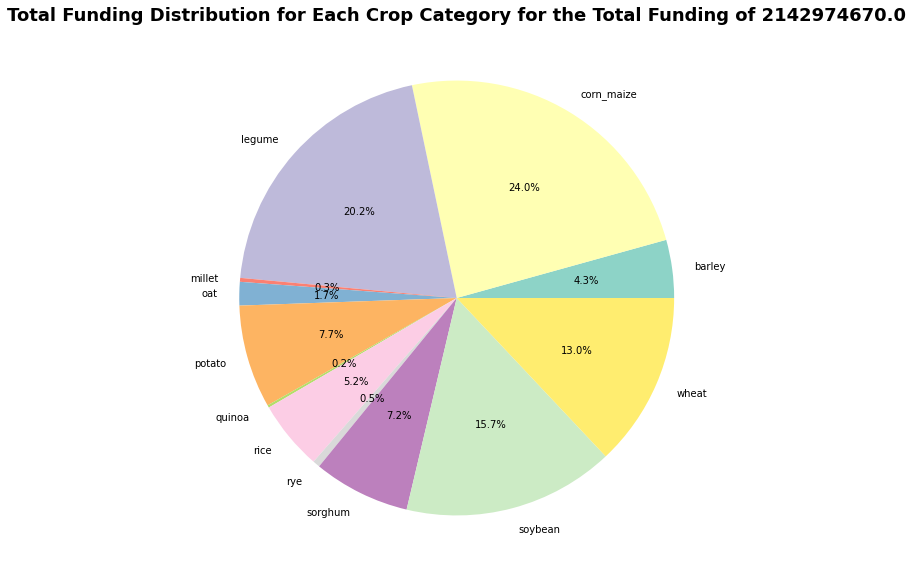

In [17]:
fig = plt.figure(figsize=(20, 10))
a = np.random.random(12)
cs = cm.Set3(np.arange(12)/12)
plt.pie(x=repartition["FY_TOTAL_COST_UNIQUE"],
        labels=repartition.index, colors=cs, autopct='%1.1f%%')
plt.title('Total Funding Distribution for Each Crop Category for the Total Funding of ' +
          str(repartition["FY_TOTAL_COST_UNIQUE"].sum()), fontsize=18, fontweight='bold')
plt.savefig('all_crop_funding_distribution.png')
plt.show()

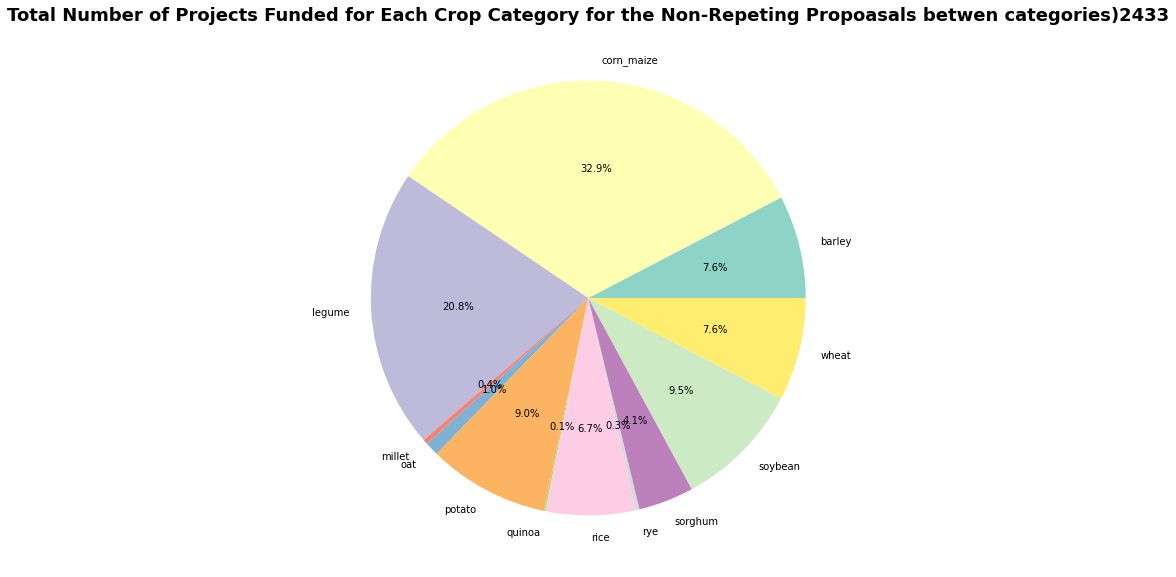

In [18]:
fig = plt.figure(figsize=(20, 10))
a = np.random.random(12)
cs = cm.Set3(np.arange(12)/12.)
plt.pie(x=repartition["COUNT_UNIQUE"],
        labels=repartition.index, colors=cs, autopct='%1.1f%%',)
plt.title('Total Number of Projects Funded for Each Crop Category for the Non-Repeting Propoasals betwen categories)' +
          str(repartition["COUNT_UNIQUE"].sum()), fontsize=18, fontweight='bold')
plt.savefig('all_crop_number_of_projects_funding_distribution.png')
plt.show()

In [21]:
repartition['COUNT_UNIQUE'].sum()

2433

In [28]:
t=whole.drop_duplicates(subset=['PROJECT_ID']).reset_index(drop=True)

In [30]:
t.to_csv('whole_removing duplicated project ids.csv')